In [25]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa


ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = np.array(
    [ia.quokka(size=(64, 64)) for _ in range(32)],
    dtype=np.uint8
)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
#     iaa.Affine(
#         scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
#         translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
#         rotate=(-25, 25),
#         shear=(-8, 8)
#     )
], random_order=False) # apply augmenters in random order

images_aug = seq(images=images)

/home/fesian/fesian_env3/lib/python3.6/site-packages/imgaug-0.3.0-py3.6.egg/imgaug/imgaug.py:182: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


In [21]:
images_aug.shape

(32, 64, 64, 3)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

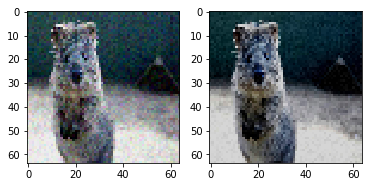

In [26]:
plt.subplot(121) 
plt.imshow(images_aug[0])
plt.subplot(122)
plt.imshow(images_aug[1])

In [29]:
images

array([[[[ 51,  80,  84],
         [ 52,  81,  85],
         [ 53,  82,  86],
         ...,
         [ 44,  74,  85],
         [ 40,  68,  82],
         [ 40,  68,  80]],

        [[ 49,  78,  82],
         [ 52,  81,  85],
         [ 53,  82,  86],
         ...,
         [ 41,  71,  82],
         [ 43,  71,  85],
         [ 41,  69,  81]],

        [[ 49,  78,  82],
         [ 50,  79,  83],
         [ 51,  80,  84],
         ...,
         [ 44,  72,  84],
         [ 40,  68,  80],
         [ 40,  68,  80]],

        ...,

        [[244, 245, 240],
         [246, 248, 242],
         [246, 247, 242],
         ...,
         [202, 203, 197],
         [206, 206, 204],
         [206, 206, 204]],

        [[244, 245, 240],
         [244, 245, 240],
         [245, 246, 241],
         ...,
         [206, 207, 202],
         [210, 211, 206],
         [211, 212, 207]],

        [[239, 240, 235],
         [247, 248, 243],
         [241, 242, 237],
         ...,
         [195, 196, 192],
        